In [1]:
# Table of contents? 

# Analysis of Ames Housing data: 
# Comparing Value of Cosmetic Feautures with Predictive Modeling
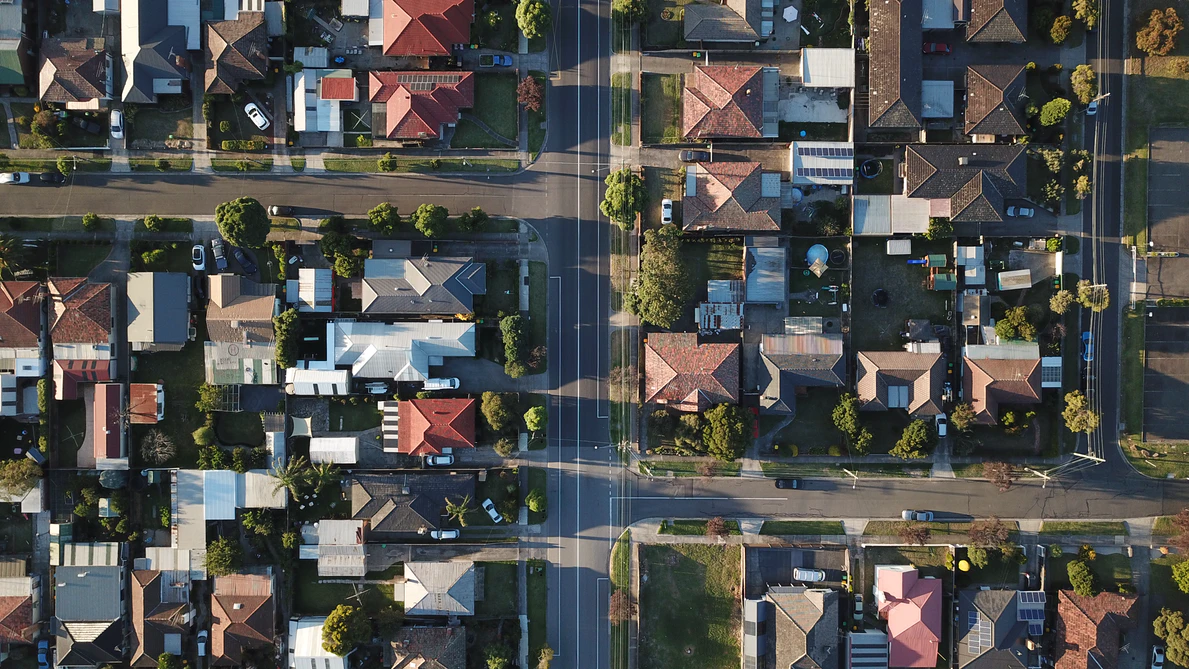

In [2]:
########################## INTRODUCTION ###########################################

# Who We Are: 

### We are consultants belonging to the organization IT-KASA who will evaluate the ames marketplace data, create .... (fill in more info)************************

## Team Members: 

- Khamanna 
- Ariel
- Shay Agarwal
- Ava 

In [3]:
######################################### WHAT WE DID #######################################################################

In [4]:
#/////////////////////////////////////////divider/////////////////////////////////////////////////////////////////////////////#

In [5]:
#######################################  Data Cleansing ######################################################################

# Exploratory Data Analysis 

In [6]:
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
import math

In [7]:
#Display settings
pd.set_option('display.max_columns', None) # display all the columns of a dataframe
pd.set_option('display.max_rows', 100)     # display 100 rows of a dataframe

In [8]:
# load the housing price data
dataset = pd.read_csv('../data/Ames_Housing_Price_Data.csv', index_col=0)

<br><br>
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### 1.2 Eploratory Data Analysis<a class="anchor" id="eda"></a>

#### 1.2.1 Remove Duplicate Rows<a class="anchor" id="dup-rows"></a>

In [9]:
dataset[dataset.duplicated()]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909276070,1717,194000,50,RL,80.0,12400,Pave,NaN,Reg,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1940,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Mn,BLQ,602.0,Unf,0.0,299.0,901.0,GasA,TA,Y,SBrkr,1125,592,0,0.0,0.0,1,1,2,1,TA,7,Typ,1,Gd,Attchd,1940.0,Unf,1.0,410.0,TA,TA,Y,0,0,0,0,113,0,NaN,NaN,NaN,0,2,2006,WD,Normal


In [10]:
dataset.drop_duplicates(inplace=True) # duplicate row removed

In [11]:
# Reset index (since one row was removed and the original index in the file does not have unique values)
dataset.reset_index(drop=True, inplace=True)

#### 1.2.2 Remove Irrelevant observations<a class="anchor" id="irrelevant"></a>

In [12]:
# PID removed since it is just an identifier for each row
dataset.drop('PID',axis=1, inplace=True)

#### 1.2.3 List of Variables with Missing Values<a class="anchor" id="listnan"></a>

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      2579 non-null   int64  
 1   SalePrice      2579 non-null   int64  
 2   MSSubClass     2579 non-null   int64  
 3   MSZoning       2579 non-null   object 
 4   LotFrontage    2117 non-null   float64
 5   LotArea        2579 non-null   int64  
 6   Street         2579 non-null   object 
 7   Alley          168 non-null    object 
 8   LotShape       2579 non-null   object 
 9   LandContour    2579 non-null   object 
 10  Utilities      2579 non-null   object 
 11  LotConfig      2579 non-null   object 
 12  LandSlope      2579 non-null   object 
 13  Neighborhood   2579 non-null   object 
 14  Condition1     2579 non-null   object 
 15  Condition2     2579 non-null   object 
 16  BldgType       2579 non-null   object 
 17  HouseStyle     2579 non-null   object 
 18  OverallQ

#### 1.2.4 Impute Missing LotFrontage Values<a class="anchor" id="lotfrontage"></a>

In [14]:
# Use Knn Imputation for Missing Values
# Variable = LotFrontage
imputer = KNNImputer(n_neighbors=round(math.sqrt(len(dataset)))) # k -> square root of the number of observations
imputed = imputer.fit_transform(dataset.select_dtypes(include='number')) # calculate values with limited columns
dataset_imputed = pd.DataFrame(imputed, columns=dataset.select_dtypes(include='number').columns) # impute dataset

In [15]:
dataset_imputed['LotFrontage'] = round(dataset_imputed['LotFrontage']) # round values to match existing values

C:\Users\shala\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\shala\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

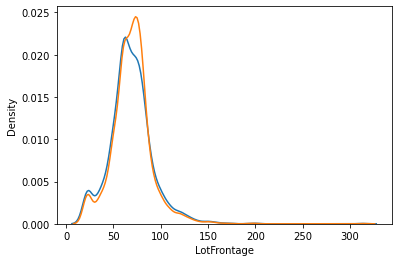

In [16]:
# confirm the distribution of 'LotFrontage' did not change significantly
sns.distplot(dataset['LotFrontage'], hist=False)
sns.distplot(dataset_imputed['LotFrontage'], hist=False)

In [17]:
# Add imputed values to original dataset
dataset['LotFrontage'] = dataset_imputed['LotFrontage']

#### 1.2.5 Impute Missing Basement related Values<a class="anchor" id="basement"></a>

In [18]:
# After researching all the Bsm columns, concluded it was best
# to replace NaN values with zeros in the following columns
dataset['TotalBsmtSF'].fillna(0, inplace=True)
dataset['BsmtHalfBath'].fillna(0, inplace=True)
dataset['BsmtFullBath'].fillna(0, inplace=True)
dataset['BsmtFinSF1'].fillna(0, inplace=True)
dataset['BsmtFinSF2'].fillna(0, inplace=True)
dataset['BsmtUnfSF'].fillna(0, inplace=True)

#### 1.2.6 Impute Missing GarageArea and GarageCars Values<a class="anchor" id="garage"></a>

In [19]:
# GarageArea and GarageCars missing values (1 entry). 
dataset[dataset['GarageArea'].isna()].filter(like="Ga")

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
433,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# filling na with zero
dataset['GarageArea'].fillna(0, inplace=True)
dataset['GarageCars'].fillna(0, inplace=True)

#### 1.2.7 Impute Missing Electrical Values<a class="anchor" id="electrical"></a>

In [21]:
# Electrical -> Replacing missing na with SBrkr (every other house built on 
# same year has Standard Circuit Breakers & Romex (SBrkr))
dataset['Electrical'].fillna("SBrkr", inplace=True)

#### 1.2.8 Impute Missing MasVnrType and MasVnrArea Values<a class="anchor" id="vnr"></a>

In [22]:
# replacing NAs in MasVnrType with None and MasVnrArea with zero
dataset['MasVnrArea'].fillna(0, inplace=True)
dataset['MasVnrType'].fillna("None", inplace=True)

#### 1.2.9 Data Consistency: BsmtExposure (Basement Exposure)<a class="anchor" id="bsmtexposure"></a>

In [23]:
# BsmtExposure is set to not basement by mistake.It should be set to No Exposure ("No")
dataset[(dataset['BsmtExposure'].isna()) & (dataset['BsmtQual'].notnull())].filter(like="Bsm")


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
813,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0
1201,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0


In [24]:
# We will impute the values manually to No Exposure("No")
dataset.loc[[813,1201],'BsmtExposure']="No"

In [25]:
# BsmtFinType2 is set to no basement by mistake.
dataset[(dataset['BsmtFinType2'].isna()) & (dataset['BsmtQual'].notnull())].filter(like="Bsm")

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
2433,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0


In [26]:
# Replacing NaN with Unf = unfinished (it is only one entry)
dataset.loc[2433,'BsmtFinType2']="Unf"

#### 1.2.10 Data Consistency: Garage related variables<a class="anchor" id="garconsistency"></a>

In [27]:
# GarageType is incorrect, there is no garage.
dataset[(dataset['GarageType']=='Detchd') & (dataset['GarageArea']==0)].filter(like="Ga")

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
433,Detchd,NaN,NaN,0.0,0.0,NaN,NaN


In [28]:
# since there is no garage, the GarageType for 433 was set to NaN
dataset.loc[433,'GarageType']="None"

In [29]:
# GarageYrBlt, GarageFinish, GarageQual, and GarageCond are NaN, but there is a Garage
dataset[(dataset['GarageType'].notnull()) & (dataset['GarageFinish'].isna())].filter(like="Ga")

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
433,None,NaN,NaN,0.0,0.0,NaN,NaN
531,Detchd,NaN,NaN,1.0,360.0,NaN,NaN


In [30]:
# Adding values to one observation with Detached garage
dataset.loc[531,'GarageYrBlt'] = 1910        # Year house was built
dataset.loc[531,'GarageFinish'] = "Unf"
dataset.loc[531,'GarageQual'] = "TA"
dataset.loc[531,'GarageCond'] = "TA"

In [31]:
# converting "NA" to zero in the GarageYrBlt column
dataset['GarageYrBlt'].fillna(0, inplace=True)
# filling all NaNs with "NA" (string) (except GarageYrBlt) ---> No garage, No basement, No pool, etc...
dataset.fillna("None", inplace=True)

In [32]:
# Garage built before the house ?
dataset[(dataset['YearBuilt']>dataset['GarageYrBlt']) & (dataset['GarageArea']>0)][['YearBuilt','GarageYrBlt','YearRemodAdd','YrSold','GarageArea','GarageType']]

,YearBuilt,GarageYrBlt,YearRemodAdd,YrSold,GarageArea,GarageType
33,1923,1922.0,2000,2008,370.0,Detchd
238,1930,1925.0,1950,2008,160.0,Detchd
254,1910,1900.0,1998,2007,506.0,Detchd
615,2006,2005.0,2007,2007,1110.0,Attchd
689,1927,1920.0,1950,2008,240.0,Detchd
701,2005,2003.0,2005,2006,736.0,BuiltIn
738,1959,1954.0,1959,2006,539.0,BuiltIn
905,1945,1925.0,1995,2008,164.0,Attchd
941,2006,2005.0,2006,2007,674.0,Attchd
945,1963,1962.0,1963,2008,336.0,Detchd


In [33]:
# Updated GarageYrBlt with YearBuilt when the GarageYrBlt is before the house YearBuilt
new_years = pd.DataFrame(dataset[(dataset['YearBuilt']>dataset['GarageYrBlt']) & (dataset['GarageArea']>0)]['YearBuilt'])
new_years.columns = ['GarageYrBlt']
dataset.update(new_years)

#### 1.2.11 Data Consistency: YearRemodAdd<a class="anchor" id="yraconsistency"></a>

In [34]:
# Houses updated (YearRemodAdd) before the house construction date
dataset[dataset['YearBuilt']>dataset['YearRemodAdd']][['YearBuilt','GarageYrBlt','YearRemodAdd','YrSold']]

,YearBuilt,GarageYrBlt,YearRemodAdd,YrSold
2033,2002,2002.0,2001,2009


In [35]:
# udpate
dataset.loc[2033,'YearRemodAdd']=2002

In [36]:
#////////////////////////////////////////////////////////////divider//////////////////////////////////////////////////////////#

In [37]:
############################# Feature Evaluation ###############################################################

#### 1.1.1 Importing Modules<a class="anchor" id="imports"></a>

In [38]:
# import modules
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
import statsmodels.formula.api as smf
from scipy import stats
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

#### 1.1.2 Display Settings<a class="anchor" id="display-setup"></a>

In [39]:
pd.set_option('display.max_columns', None) # display all the columns of a dataframe
pd.set_option('display.max_rows', 100)     # display 100 rows of a dataframe

#### 1.1.3 Load data<a class="anchor" id="read-file"></a>

In [40]:
# Load cleaned data - see "Data Cleansing.ipynb"
dataset = pd.read_csv('../ariel/Prep_Data.csv')
dataset_encoded = pd.read_csv('../ariel/Data_Encoded.csv')

#### 1.1.4 Features for Model (Including Target Variable)<a class="anchor" id="features"></a>

In [41]:
model_features = ['SalePrice','TotalBsmtSF', 'OverallQual', 'YearBuilt', 'log10_GrLivArea', 'OverallCond', 'log10_LotArea', 'BsmtUnfSF']

<br><br>
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### 1.5 Evaluating Overall Quality, Fence, and Roof<a class="anchor" id="eval-section"></a>

#### 1.2.1 Evaluation Roof Material<a class="anchor" id="eval-roof"></a>

<h4>Roof material</h4>
<p>&nbsp;</p>
<table style="border-collapse: collapse; width: 46.0227%; height: 162px;" border="1">
<thead>
<tr style="border-style: ridge; height: 18px;">
<td style="width: 3.50375%; height: 18px; border-style: ridge;">Abbreviation</td>
<td style="width: 9.18553%; height: 18px; border-style: ridge;">Material</td>
</tr>
</thead>
<tbody>
<tr style="height: 18px;">
<td style="width: 3.50375%; height: 18px; border-style: ridge;">ClyTile</td>
<td style="width: 9.18553%; height: 18px; border-style: ridge;">Clay or Tile</td>
</tr>
<tr style="height: 18px;">
<td style="width: 3.50375%; height: 18px; border-style: ridge;">CompShg</td>
<td style="width: 9.18553%; height: 18px; border-style: ridge;">Standard (Composite) Shingle</td>
</tr>
<tr style="height: 18px;">
<td style="width: 3.50375%; height: 18px; border-style: ridge;">Membran</td>
<td style="width: 9.18553%; height: 18px; border-style: ridge;">Membrane</td>
</tr>
<tr style="height: 18px;">
<td style="width: 3.50375%; height: 18px; border-style: ridge;">Metal</td>
<td style="width: 9.18553%; height: 18px; border-style: ridge;">Metal</td>
</tr>
<tr style="height: 18px;">
<td style="width: 3.50375%; height: 18px; border-style: ridge;">Roll</td>
<td style="width: 9.18553%; height: 18px; border-style: ridge;">Roll</td>
</tr>
<tr style="height: 18px;">
<td style="width: 3.50375%; height: 18px; border-style: ridge;">Tar&amp;Grv</td>
<td style="width: 9.18553%; height: 18px; border-style: ridge;">Gravel &amp; Tar</td>
</tr>
<tr style="height: 18px;">
<td style="width: 3.50375%; height: 18px; border-style: ridge;">WdShake</td>
<td style="width: 9.18553%; height: 18px; border-style: ridge;">Wood Shakes</td>
</tr>
<tr style="height: 18px;">
<td style="width: 3.50375%; height: 18px; border-style: ridge;">WdShngl</td>
<td style="width: 9.18553%; height: 18px; border-style: ridge;">Wood Shingles</td>
</tr>
</tbody>
</table>

In [42]:
roof_matl_dict = ({"ClyTile":"Clay or Tile","CompShg":"Standard (Composite) Shingle","Membran":"Membrane",
                   "Metal":"Metal","Roll":"Roll","Tar&Grv":"Gravel & Tar","WdShake":"Wood Shakes",
                   "WdShngl":"Wood Shingles",})

In [43]:
roofmatl_count = dataset.groupby(['RoofMatl']).agg({"RoofMatl":"count"})
roofmatl_count.columns = ['Number of Houses']
roofmatl_count['Percentage of Houses'] = roofmatl_count['Number of Houses']/dataset.shape[0]*100
roofmatl_count.reset_index(inplace=True)
roofmatl_count.columns=["Roof Material",'Number of Houses','Percentage of Houses']
roofmatl_count['Roof Material'].replace(roof_matl_dict, inplace=True)

In [44]:
roofmatl_count.style.applymap(lambda x: 'color: red' if (x<1.0) else 'color: black', subset=['Percentage of Houses']).hide_index()

Roof Material,Number of Houses,Percentage of Houses
Standard (Composite) Shingle,2381,98.673850
Membrane,1,0.041442
Metal,1,0.041442
Roll,1,0.041442
Gravel & Tar,15,0.621633
Wood Shakes,7,0.290095
Wood Shingles,7,0.290095


<ul>
<li>Approximately 99% of the houses in our dataset have Standard Composite Shingle on their roof. It is not possible to see a pattern to determine if a different roof materials would add or subtract value from the base price of the house.</li>
</ul>

We try looking for different patterns by grouping houses by neighborhood and size but it was not clear if the roof material made any difference on the price. However, after looking at the year built variable we were able to understand that in the last 30 year (since 1990) 99% of the houses have standard shingles.

In [45]:
# Evaluating the YearBuilt variable for each roof materical
df_roof_temp = dataset.groupby('RoofMatl').agg({"YearBuilt":["min","max","mean"]}).reset_index()
df_roof_temp.columns = ['Roof Material','Minimum(Year Built)', 'Maximum(Year Built)', 'Average(Year Built)']
df_roof_temp['Roof Material'].replace(roof_matl_dict, inplace=True)
df_roof_temp['Average(Year Built)'] = df_roof_temp['Average(Year Built)'].astype('int32')

In [46]:
df_roof_temp.style.hide_index()

Roof Material,Minimum(Year Built),Maximum(Year Built),Average(Year Built)
Standard (Composite) Shingle,1872,2010,1969
Membrane,1954,1954,1954
Metal,1969,1969,1969
Roll,1948,1948,1948
Gravel & Tar,1940,2004,1963
Wood Shakes,1967,1993,1979
Wood Shingles,1892,1994,1966


In [47]:
dataset[dataset['YearBuilt']>=1990].groupby('RoofMatl').agg({'RoofMatl':'count'})

,RoofMatl
RoofMatl,
CompShg,833
Tar&Grv,1
WdShake,1
WdShngl,1


Summary: it is clear from the data analyzed that the most prominent roof material is standard shingles. Should the house roof material requires replacement we recommend to use standard shingles. We are not able to determine from the data available if choosing other materials would increase or decrease the value of the house.

In [48]:
# Dataset of Model Features + dummified Roof Material features
df_roof = pd.concat([dataset_encoded[model_features],pd.get_dummies(dataset['RoofMatl'])], axis=1)
df_roof.rename(columns={"Tar&Grv":"TarGrv"}, inplace=True)

In [49]:
# Model to evaluate roof material
mlr_model_roof = LinearRegression()
mlr_model_roof.fit(df_roof.drop(columns=['SalePrice']), np.log10(df_roof['SalePrice']))
mlr_model_roof.score(df_roof.drop(columns=['SalePrice']), np.log10(df_roof['SalePrice']))

0.9110307118929295

In [50]:
# Create a list of observations to predict the SalePrice (only house with WdShae and WdShngl)
df_roof_test = df_roof[(df_roof['WdShngl']==1) | (df_roof['WdShake']==1)]
df_roof_test.reset_index(drop=True, inplace=True)

In [51]:
# Predict SalePrice (7 WdShake and 7 WdShngl)
for i,y_hat in enumerate(mlr_model_roof.predict(df_roof_test.drop(columns='SalePrice'))):
    print(10**y_hat,' - ', df_roof_test.loc[i,'SalePrice'],' = ', 10**y_hat - df_roof_test.loc[i,'SalePrice'])

203526.99481187676  -  190000  =  13526.994811876764
408806.2348396586  -  385000  =  23806.234839658602
352754.0238223699  -  278000  =  74754.02382236993
674276.2040086172  -  755000  =  -80723.7959913828
207237.13545162516  -  192000  =  15237.13545162516
302617.54035789525  -  292500  =  10117.540357895254
283405.1777860627  -  279000  =  4405.177786062704
270801.95340389945  -  280000  =  -9198.046596100554
239344.33646652545  -  260000  =  -20655.66353347455
378725.19863339775  -  475000  =  -96274.80136660225
243346.85538759615  -  287500  =  -44153.14461240385
178771.02526348998  -  168500  =  10271.02526348998
244739.69457640237  -  242000  =  2739.6945764023694
241882.8654269205  -  228000  =  13882.8654269205


In [52]:
df_roof_test['WdShake']=0
df_roof_test['WdShngl']=0
df_roof_test['CompShg']=1

In [53]:
# Predict SalePrice (7 WdShake and 7 WdShngl)
for i,y_hat in enumerate(mlr_model_roof.predict(df_roof_test.drop(columns='SalePrice'))):
    print(10**y_hat,' - ', df_roof_test.loc[i,'SalePrice'],' = ', 10**y_hat - df_roof_test.loc[i,'SalePrice'])

209503.01402928037  -  190000  =  19503.01402928037
375382.6114656635  -  385000  =  -9617.388534336525
323913.1778882941  -  278000  =  45913.1778882941
619147.9990738992  -  755000  =  -135852.00092610077
213322.09290487753  -  192000  =  21322.09290487753
311503.08518880955  -  292500  =  19003.08518880955
260234.2299939461  -  279000  =  -18765.770006053906
248661.43369518177  -  280000  =  -31338.566304818232
246372.03495744424  -  260000  =  -13627.965042555763
347760.9732312851  -  475000  =  -127239.02676871489
250492.07701107263  -  287500  =  -37007.92298892737
164154.86995721527  -  168500  =  -4345.130042784731
251925.81315198465  -  242000  =  9925.81315198465
248985.10094849355  -  228000  =  20985.10094849355


<br><br>
<hr>

#### 1.2.2 Fence Quality Evaluation<a class="anchor" id="eval-fence"></a>

<p><strong>Fence Quality</strong></p>
<table style="border-collapse: collapse; width: 44.472%; height: 103px;" border="1">
<thead>
<tr style="height: 18px;">
<td style="width: 8.16763%; border-style: ridge; text-align: center;"><em><strong>Rating</strong></em></td>
<td style="width: 8.26072%; height: 18px; border-style: ridge; text-align: center;"><em><strong>Quality</strong></em></td>
<td style="width: 38.401%; height: 18px; border-style: ridge; text-align: center;"><em><strong>Description</strong></em></td>
</tr>
</thead>
<tbody>
<tr style="height: 18px;">
<td style="width: 8.16763%; border-style: ridge; text-align: center;">4</td>
<td style="width: 8.26072%; height: 18px; border-style: ridge; text-align: center;">GdPrv</td>
<td style="width: 38.401%; height: 18px; border-style: ridge; text-align: left;">&nbsp; Good Privacy</td>
</tr>
<tr style="height: 18px;">
<td style="width: 8.16763%; border-style: ridge; text-align: center;">3</td>
<td style="width: 8.26072%; height: 18px; border-style: ridge; text-align: center;">MnPrv</td>
<td style="width: 38.401%; height: 18px; border-style: ridge; text-align: left;">&nbsp; Minimum Privacy</td>
</tr>
<tr style="height: 18px;">
<td style="width: 8.16763%; border-style: ridge; text-align: center;">2</td>
<td style="width: 8.26072%; height: 18px; border-style: ridge; text-align: center;">GdWo</td>
<td style="width: 38.401%; height: 18px; border-style: ridge; text-align: left;">&nbsp; Good Wood</td>
</tr>
<tr style="height: 13px;">
<td style="width: 8.16763%; border-style: ridge; text-align: center;">1</td>
<td style="width: 8.26072%; height: 13px; border-style: ridge; text-align: center;">MnWw</td>
<td style="width: 38.401%; height: 13px; border-style: ridge; text-align: left;">&nbsp; Minimum Wood/Wire</td>
</tr>
<tr style="height: 18px;">
<td style="width: 8.16763%; border-style: ridge; text-align: center;">0</td>
<td style="width: 8.26072%; height: 18px; border-style: ridge; text-align: center;">NA</td>
<td style="width: 38.401%; height: 18px; border-style: ridge; text-align: left;">&nbsp; No Fence</td>
</tr>
</tbody>
</table>

In [54]:
roof_fence_dict = ({0:"No Fence",1:"Minimum Wood/Wire",2:"Good Wood",3:"Minimum Privacy",4:"Good Privacy"})

In [55]:
df_fence = (dataset.groupby('Fence').agg(count=pd.NamedAgg(column="Fence", aggfunc="count"))/dataset.shape[0]*100).reset_index()
df_fence.columns=['Fence Rating','Percentage of Houses']
df_fence['Fence Rating'].replace(roof_fence_dict, inplace=True)
df_fence.style.hide_index()

Fence Rating,Percentage of Houses
No Fence,79.196022
Minimum Wood/Wire,0.414422
Good Wood,4.102777
Minimum Privacy,11.852466
Good Privacy,4.434314


<b>Trend on type of fences in last 20 (since 1990) years</b>

In [56]:
df_fence_temp = dataset_encoded.copy()
df_fence_temp = pd.concat([df_fence_temp.filter(model_features), dataset['Fence']],axis=1)

In [57]:
df_fence_temp.Fence.replace(roof_fence_dict, inplace=True)

In [58]:
df_fence_temp[df_fence_temp['YearBuilt']>=1990].groupby('Fence').agg({"Fence":"count"})

,Fence
Fence,
Good Privacy,25
Good Wood,4
Minimum Privacy,15
No Fence,792


In [59]:
df_fence_temp_test = pd.concat([df_fence_temp[df_fence_temp['Fence']!='No Fence'][model_features], pd.get_dummies(df_fence_temp[df_fence_temp['Fence']!='No Fence']['Fence'])], axis = 1)

In [60]:
# Model to evaluate roof material
mlr_model_fence = LinearRegression()
mlr_model_fence.fit(df_fence_temp_test.drop(columns=['SalePrice']), np.log10(df_fence_temp_test['SalePrice']))
mlr_model_fence.score(df_fence_temp_test.drop(columns=['SalePrice']), np.log10(df_fence_temp_test['SalePrice']))

0.8652079868146184

In [61]:
print(np.round(mlr_model_fence.coef_,4))
print(df_fence_temp_test.drop(columns=['SalePrice']).columns)

[ 1.000e-04  3.550e-02  1.500e-03  4.276e-01  2.610e-02  1.286e-01
 -0.000e+00  1.000e-02  7.000e-04  9.000e-04 -1.170e-02]
Index(['TotalBsmtSF', 'OverallQual', 'YearBuilt', 'log10_GrLivArea',
       'OverallCond', 'log10_LotArea', 'BsmtUnfSF', 'Good Privacy',
       'Good Wood', 'Minimum Privacy', 'Minimum Wood/Wire'],
      dtype='object')


In [62]:
df_fence_temp_test = pd.concat([df_fence_temp_test[df_fence_temp_test['Minimum Wood/Wire']==1].head(5),
           df_fence_temp_test[df_fence_temp_test['Good Wood']==1].head(5),
           df_fence_temp_test[df_fence_temp_test['Good Privacy']==1].head(5),
           df_fence_temp_test[df_fence_temp_test['Minimum Privacy']==1].head(5)],
          axis=0)
df_fence_temp_test.reset_index(inplace=True)

In [63]:
df_fence_temp_test

,index,SalePrice,TotalBsmtSF,OverallQual,YearBuilt,log10_GrLivArea,OverallCond,log10_LotArea,BsmtUnfSF,Good Privacy,Good Wood,Minimum Privacy,Minimum Wood/Wire
0,294,141000,1092.0,5,1957,3.038223,5,4.171726,197.0,0,0,0,1
1,399,123000,864.0,5,1967,2.954243,5,3.894205,95.0,0,0,0,1
2,915,110000,720.0,5,1947,3.108565,7,3.544068,408.0,0,0,0,1
3,991,145000,588.0,6,1958,3.056142,8,4.020444,81.0,0,0,0,1
4,1287,127500,854.0,6,1954,3.106531,5,3.857332,181.0,0,0,0,1
5,10,136000,624.0,5,1991,3.105169,5,4.020154,166.0,0,1,0,0
6,49,72000,432.0,4,1925,2.827369,4,3.931153,432.0,0,1,0,0
7,98,153000,450.0,6,1978,3.014521,8,3.886660,0.0,0,1,0,0
8,114,167000,1277.0,7,1970,3.106191,5,4.026452,499.0,0,1,0,0
9,115,138500,1052.0,5,1968,3.022016,5,3.924279,36.0,0,1,0,0


In [64]:
df_fence_temp_test['Minimum Wood/Wire']=1
df_fence_temp_test['Minimum Privacy']=0
df_fence_temp_test['Good Wood']=0
df_fence_temp_test['Good Privacy']=0
for i, coef_ in enumerate(mlr_model_fence.predict(df_fence_temp_test.drop(columns=['SalePrice']))):
    print(10**coef_," - ",df_fence_temp_test.loc[i,'SalePrice']," = ", 10**coef_ - df_fence_temp_test.loc[i,'SalePrice'])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 11 is different from 12)

In [65]:
df_fence_temp_test['Minimum Wood/Wire']=0
df_fence_temp_test['Minimum Privacy']=1
df_fence_temp_test['Good Wood']=0
df_fence_temp_test['Good Privacy']=0
for i, coef_ in enumerate(mlr_model_fence.predict(df_fence_temp_test.drop(columns=['SalePrice']))):
    print(10**coef_," - ",df_fence_temp_test.loc[i,'SalePrice']," = ", 10**coef_ - df_fence_temp_test.loc[i,'SalePrice'])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 11 is different from 12)

<br><br><br><br>
<hr>
<hr>

In [66]:
# Dataset of Model Features + dummified Fence feature
df_fence = pd.concat([dataset_encoded[model_features],pd.get_dummies(dataset['Fence'])], axis=1)


In [67]:
# Model to evaluate roof material
mlr_model_fence = LinearRegression()
mlr_model_fence.fit(df_fence.drop(columns=['SalePrice']), np.log10(df_fence['SalePrice']))
mlr_model_fence.score(df_fence.drop(columns=['SalePrice']), np.log10(df_fence['SalePrice']))

0.9108802494011978

In [68]:
# Select 5 houses with no fence to test
df_fence_test = df_fence[df_fence[0]==1].head(5)

In [69]:
for i, coef_ in enumerate(mlr_model_fence.predict(df_fence_test.drop(columns=['SalePrice']))):
    print(10**coef_," - ",df_fence_test.loc[i,'SalePrice']," = ", 10**coef_ - df_fence_test.loc[i,'SalePrice'])

113645.80674452214  -  126000  =  -12354.193255477861
129578.91342986534  -  139500  =  -9921.086570134663
129653.89508722685  -  124900  =  4753.895087226847
92705.56503288032  -  114000  =  -21294.434967119683
241319.7558071002  -  227000  =  14319.755807100213


In [70]:
df_fence_test[0]=0
df_fence_test[1]=1
for i, coef_ in enumerate(mlr_model_fence.predict(df_fence_test.drop(columns=['SalePrice']))):
    print(10**coef_," - ",df_fence_test.loc[i,'SalePrice']," = ", 10**coef_ - df_fence_test.loc[i,'SalePrice'])

109362.68676308468  -  126000  =  -16637.313236915317
124695.30136195978  -  139500  =  -14804.698638040223
124767.4570863275  -  124900  =  -132.5429136724997
89211.64766490036  -  114000  =  -24788.35233509964
232224.81867196638  -  227000  =  5224.818671966379


In [71]:
df_fence_test[1]=0
df_fence_test[2]=1
for i, coef_ in enumerate(mlr_model_fence.predict(df_fence_test.drop(columns=['SalePrice']))):
    print(10**coef_," - ",df_fence_test.loc[i,'SalePrice']," = ", 10**coef_ - df_fence_test.loc[i,'SalePrice'])

112589.02973854975  -  126000  =  -13410.970261450246
128373.97661702364  -  139500  =  -11126.02338297636
128448.26103008165  -  124900  =  3548.261030081645
91843.50850603757  -  114000  =  -22156.49149396243
239075.7559946205  -  227000  =  12075.7559946205


In [72]:
df_fence_test[2]=0
df_fence_test[3]=1
for i, coef_ in enumerate(mlr_model_fence.predict(df_fence_test.drop(columns=['SalePrice']))):
    print(10**coef_," - ",df_fence_test.loc[i,'SalePrice']," = ", 10**coef_ - df_fence_test.loc[i,'SalePrice'])

112465.25358435298  -  126000  =  -13534.746415647023
128232.84708458604  -  139500  =  -11267.152915413957
128307.049832148  -  124900  =  3407.049832147997
91742.53919937229  -  114000  =  -22257.460800627712
238812.9250802106  -  227000  =  11812.92508021061


In [73]:
df_fence_test[3]=0
df_fence_test[4]=1
for i, coef_ in enumerate(mlr_model_fence.predict(df_fence_test.drop(columns=['SalePrice']))):
    print(10**coef_," - ",df_fence_test.loc[i,'SalePrice']," = ", 10**coef_ - df_fence_test.loc[i,'SalePrice'])

113389.20013058915  -  126000  =  -12610.799869410854
129286.33064863608  -  139500  =  -10213.669351363918
129361.14300112173  -  124900  =  4461.143001121731
92496.24044962217  -  114000  =  -21503.75955037783
240774.86772731383  -  227000  =  13774.867727313831


#### 1.2.3 Overall Quality Evaluation<a class="anchor" id="eval-overall"></a>

In [74]:
dataset['OverallQual'].value_counts()

5     715
6     640
7     493
8     256
4     185
9      64
3      32
10     15
2      10
1       3
Name: OverallQual, dtype: int64

In [75]:
#/////////////////////////////////////////divider/////////////////////////////////////////////////////////////////////////////#

In [76]:
##################################################FEATURE SELECTION ################################################################

# FEATURE SELECTION
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<br>

In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2413 entries, 0 to 2412
Data columns (total 67 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GrLivArea     2413 non-null   int64  
 1   SalePrice     2413 non-null   int64  
 2   MSSubClass    2413 non-null   int64  
 3   MSZoning      2413 non-null   object 
 4   LotFrontage   2413 non-null   float64
 5   LotArea       2413 non-null   int64  
 6   Street        2413 non-null   object 
 7   LotShape      2413 non-null   int64  
 8   LandContour   2413 non-null   object 
 9   Utilities     2413 non-null   int64  
 10  LotConfig     2413 non-null   object 
 11  LandSlope     2413 non-null   int64  
 12  Neighborhood  2413 non-null   object 
 13  Condition1    2413 non-null   object 
 14  Condition2    2413 non-null   object 
 15  BldgType      2413 non-null   object 
 16  HouseStyle    2413 non-null   object 
 17  OverallQual   2413 non-null   int64  
 18  OverallCond   2413 non-null 

In [78]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [79]:
pd.set_option('display.max_columns', None) # display all the columns of a dataframe
pd.set_option('display.max_rows', 100)     # display 100 rows of a dataframe

In [80]:
# Load cleaned data - see "Data Cleansing.ipynb"
dataset = pd.read_csv('../ariel/Price_Data_cleaned.csv')

In [81]:
dataset.select_dtypes(exclude="number").head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,GLQ,ALQ,GasA,TA,Y,SBrkr,Gd,Typ,None,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal
2,C (all),Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,Gd,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Detchd,Unf,TA,Po,N,None,None,None,WD,Normal
3,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,Gd,BrkTil,Fa,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,None,Detchd,Unf,TA,TA,N,None,None,None,WD,Normal
4,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal


<br><br>
## Encoding Categorical Features
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [82]:
# set the following columns to object
dataset['MSSubClass'] = dataset['MSSubClass'].astype(object)
dataset['YearBuilt'] = dataset['YearBuilt'].astype(object)
dataset['YearRemodAdd'] = dataset['YearRemodAdd'].astype(object)
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].astype(object)
dataset['MoSold'] = dataset['MoSold'].astype(object)
dataset['YrSold'] = dataset['YrSold'].astype(object)

In [83]:
# NaN values have a meaning
temp = pd.DataFrame(dataset.isna().sum())
temp[temp[0]>0].sort_values(0, ascending=False)

,0


In [84]:
# filling all NaNs with "NA"
dataset.fillna("NA", inplace=True)
# converting "NA" to zero in the GarageYrBlt column
dataset['GarageYrBlt'][dataset['GarageYrBlt']=="NA"]# = 0

Series([], Name: GarageYrBlt, dtype: float64)

In [85]:
# Encode all categorical variables
label_encoder = LabelEncoder()
for column_name in dataset.select_dtypes(include="object").columns:
    dataset[column_name] = label_encoder.fit_transform(dataset[column_name]).astype('float64') # Fit label encoder and return encoded labels

<br><br>
## Eliminating Highly Correlated Features
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [86]:
# Generate correlation matrix
corr_matrix = dataset.corr(method="pearson") # pearson? kendall? which is best

In [87]:
# features with correlation higher than 0.7
temp = corr_matrix[(corr_matrix>0.7) & (corr_matrix<1.0)].drop('SalePrice').drop('SalePrice', axis=1)
temp2 = temp[temp[temp.isna().any(axis=1)].sum()>0]
temp2[temp2.index]

,GrLivArea,MSSubClass,BldgType,Exterior1st,Exterior2nd,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,GarageCars,GarageArea
GrLivArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.807432,NaN,NaN
MSSubClass,NaN,NaN,0.747653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BldgType,NaN,0.747653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exterior1st,NaN,NaN,NaN,NaN,0.86023,NaN,NaN,NaN,NaN,NaN
Exterior2nd,NaN,NaN,NaN,0.86023,NaN,NaN,NaN,NaN,NaN,NaN
TotalBsmtSF,NaN,NaN,NaN,NaN,NaN,NaN,0.78428,NaN,NaN,NaN
1stFlrSF,NaN,NaN,NaN,NaN,NaN,0.78428,NaN,NaN,NaN,NaN
TotRmsAbvGrd,0.807432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageCars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.88991
GarageArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.88991,NaN


<AxesSubplot:>

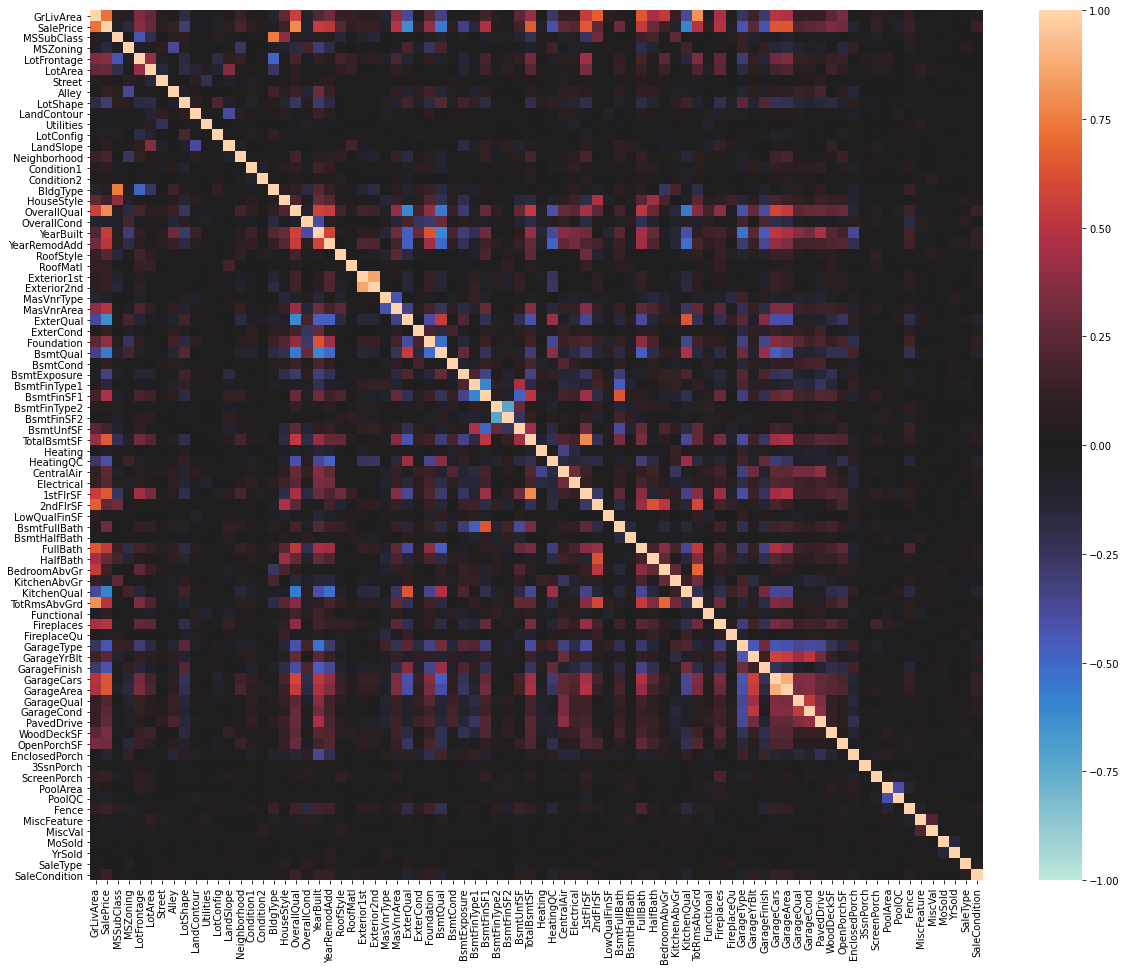

In [88]:
# plot the correlation matrix (note: not all of the features fit the plot)
fig=plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, center= 0)

<br><br>
## Top 20 Features - Correlation Between Target and Feature
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [89]:
# Return the top n features using the correlation between target and feature
abs(correlation['SalePrice']).sort_values(ascending=False)#.head(21)#.index[1:21]

NameError: name 'correlation' is not defined

<br><br>
## Using Chi-squared to Select Features
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
Note: Since the target value is continues, does this method of feature selection is good in this case? All the categorical variables were encoded but is that enough to yield good results?

In [90]:
X = dataset.drop('SalePrice',axis=1) # features
y = dataset['SalePrice'] # target

In [91]:
num_f = 40                                    # Number of features to select
X_norm = MinMaxScaler().fit_transform(X)      # Transform features by scaling each feature to a given range.
chi_selector = SelectKBest(chi2, k=num_f)     # Create selector: Select features according to the k highest scores.
chi_selector.fit(X_norm, y)                   # Run score function on (X,y) and get appropriate features.
chi_support = chi_selector.get_support()      # Get a mask, or integer index, of the features selected.
chi_features = X.loc[:,chi_support].columns.tolist()  # Get list of selected features

In [92]:
chi_features

['MSSubClass',
 'LotShape',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'YearBuilt',
 'YearRemodAdd',
 'RoofMatl',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'HeatingQC',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenQual',
 'Fireplaces',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

<br><br>
## Using Lasso Regression to Select Features
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [93]:
num_f = 40 # number of features to select
# SelectFromModel -> Meta-transformer for selecting features based on importance weights.
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1", solver='liblinear'), max_features=num_f)
# Penalty="l1" -> indicates regularization using L1
embeded_lr_selector.fit(X_norm, y) # Fit the SelectFromModel meta-transformer.

embeded_lr_support = embeded_lr_selector.get_support() # Get a mask, or integer index, of the features selected
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist() # List of features
print(str(len(embeded_lr_feature)), 'selected features')

40 selected features


In [94]:
embeded_lr_feature

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'FullBath',
 'HalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

<br><br>
## Using Random Forest to Select Features
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [95]:
from sklearn.ensemble import RandomForestClassifier
num_f = 40 # number of features to select
# SelectFromModel -> Meta-transformer for selecting features based on importance weights.
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_f)
# n_estimators -> The number of trees in the forest.
embeded_rf_selector.fit(X, y) # Fit the SelectFromModel meta-transformer.

embeded_rf_support = embeded_rf_selector.get_support() # Get a mask, or integer index, of the features selected
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist() # List of features
print(str(len(embeded_rf_feature)), 'selected features')

27 selected features


In [96]:
embeded_rf_feature

['GrLivArea',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'MoSold',
 'YrSold']

<br><br>
## Using F Test to Select Features
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
Note: Categorical variables have been encoded, is that enough?

In [97]:
value_f, p_f = f_classif(X_norm, y)
pd.Series(p_f, index=X.columns).sort_values().head(40)

OverallQual     3.640980e-271
GrLivArea       2.544883e-177
Street          1.161482e-171
ExterQual       3.977760e-150
1stFlrSF        1.045746e-112
TotalBsmtSF     3.097936e-111
GarageCars      5.613187e-107
GarageArea       1.012057e-98
FullBath         9.895901e-88
YearBuilt        3.198863e-82
KitchenQual      1.176853e-78
MasVnrArea       1.407854e-66
BsmtQual         1.285422e-65
Condition2       1.458450e-54
LotArea          3.135413e-50
YearRemodAdd     1.104675e-49
BsmtFinSF1       5.502965e-48
Utilities        3.203043e-42
TotRmsAbvGrd     6.919798e-39
CentralAir       1.371121e-38
GarageType       3.097812e-33
GarageFinish     5.761077e-30
Fireplaces       7.020478e-29
MSZoning         4.802462e-25
PavedDrive       3.093518e-21
Foundation       3.491065e-21
GarageYrBlt      5.319398e-18
2ndFlrSF         1.029868e-15
LotFrontage      2.325227e-14
GarageCond       4.212570e-13
RoofMatl         8.289425e-13
BsmtExposure     1.051602e-12
HeatingQC        1.742898e-12
LotShape  

<br><br>
## Using Mutual Information to Select Features
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [99]:
mutual_scores = mutual_info_classif(X_norm, y)
pd.Series(mutual_scores, index=X.columns).sort_values(ascending=False)

Street           2.825756
MiscFeature      2.574924
SaleType         2.525422
Alley            2.456916
CentralAir       2.451025
GarageCond       2.417688
Functional       2.395741
Electrical       2.368920
LandContour      2.299795
PavedDrive       2.296888
BsmtCond         2.261268
KitchenAbvGr     2.259046
GarageQual       2.254609
Condition2       2.220387
Heating          2.190605
SaleCondition    2.094401
Condition1       2.009503
ExterCond        2.007686
BsmtFinType2     1.869922
FullBath         1.845653
Fence            1.743394
ExterQual        1.674128
KitchenQual      1.599893
MSZoning         1.527654
RoofStyle        1.437261
GarageCars       1.312052
BsmtQual         1.269920
LotConfig        1.210960
GarageType       1.168835
PoolQC           1.098638
MasVnrType       1.078927
LotShape         1.063366
Foundation       1.018831
OverallQual      0.857433
GarageFinish     0.854213
FireplaceQu      0.808308
OverallCond      0.806633
BedroomAbvGr     0.794180
Fireplaces  

In [100]:
X.iloc[:,:]

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,856,30,5.0,64.0,7890,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,6,6,1939,1950,1.0,0.0,13.0,14.0,2.0,0.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,238.0,6.0,0.0,618.0,856.0,1.0,4.0,1.0,3.0,856,0,0,1.0,0.0,1,0,2,1,4.0,4,6.0,1,2.0,5.0,1939.0,3.0,2.0,399.0,5.0,5.0,2.0,0,0,0,0,166,0,3.0,4.0,1.0,0,3,2010,9.0,4.0
1,1049,120,5.0,42.0,4235,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,5,5,1984,1984,1.0,0.0,6.0,6.0,1.0,149.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,552.0,0.0,393.0,104.0,1049.0,1.0,4.0,1.0,3.0,1049,0,0,1.0,0.0,2,0,2,1,2.0,5,6.0,0,3.0,1.0,1984.0,0.0,1.0,266.0,5.0,5.0,2.0,0,105,0,0,0,0,3.0,4.0,1.0,0,2,2009,9.0,4.0
2,1001,30,1.0,60.0,6060,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,5,9,1930,2007,3.0,0.0,8.0,8.0,2.0,0.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,737.0,6.0,0.0,100.0,837.0,1.0,0.0,1.0,3.0,1001,0,0,0.0,0.0,1,0,2,1,2.0,5,6.0,0,3.0,5.0,1930.0,3.0,1.0,216.0,5.0,4.0,0.0,154,0,42,86,0,0,3.0,4.0,1.0,0,11,2007,9.0,4.0
3,1039,70,5.0,80.0,8146,1.0,1.0,3.0,3.0,0.0,0.0,0.0,20.0,2.0,2.0,0.0,5.0,4,8,1900,2003,1.0,0.0,8.0,8.0,2.0,0.0,2.0,2.0,0.0,1.0,5.0,3.0,6.0,0.0,6.0,0.0,405.0,405.0,1.0,2.0,1.0,3.0,717,322,0,0.0,0.0,1,0,2,1,4.0,6,6.0,0,3.0,5.0,1940.0,3.0,1.0,281.0,5.0,5.0,0.0,0,0,168,0,111,0,3.0,4.0,1.0,0,5,2009,9.0,4.0
4,1665,60,5.0,70.0,8400,1.0,1.0,3.0,3.0,0.0,4.0,0.0,17.0,2.0,2.0,0.0,5.0,8,6,2001,2001,1.0,0.0,12.0,13.0,2.0,0.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,643.0,6.0,0.0,167.0,810.0,1.0,0.0,1.0,3.0,810,855,0,1.0,0.0,2,1,3,1,2.0,6,6.0,0,3.0,1.0,2001.0,0.0,2.0,528.0,5.0,5.0,2.0,0,45,0,0,0,0,3.0,4.0,1.0,0,11,2009,9.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,952,30,5.0,66.0,8854,1.0,1.0,3.0,3.0,0.0,4.0,0.0,3.0,2.0,2.0,0.0,1.0,6,6,1916,1950,1.0,0.0,13.0,14.0,2.0,0.0,3.0,4.0,0.0,5.0,5.0,3.0,6.0,0.0,6.0,0.0,952.0,952.0,3.0,1.0,0.0,1.0,952,0,0,0.0,0.0,1,0,2,1,1.0,4,6.0,1,2.0,5.0,1916.0,3.0,1.0,192.0,1.0,4.0,1.0,0,98,0,0,40,0,3.0,4.0,1.0,0,5,2009,9.0,4.0
2575,1733,20,5.0,74.0,13680,1.0,1.0,0.0,3.0,0.0,1.0,0.0,7.0,2.0,2.0,0.0,2.0,3,5,1955,1955,3.0,0.0,3.0,14.0,2.0,0.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1733,0,0,0.0,0.0,2,0,4,1,4.0,8,3.0,1,2.0,1.0,1955.0,3.0,2.0,452.0,5.0,5.0,2.0,0,0,0,0,0,0,3.0,4.0,1.0,0,6,2009,9.0,4.0
2576,2002,90,4.0,82.0,6270,1.0,1.0,3.0,1.0,0.0,4.0,0.0,6.0,2.0,2.0,2.0,5.0,5,6,1949,1950,1.0,0.0,8.0,8.0,2.0,0.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,284.0,6.0,0.0,717.0,1001.0,1.0,4.0,0.0,0.0,1001,1001,0,0.0,0.0,2,0,4,2,4.0,8,6.0,0,3.0,0.0,1949.0,3.0,3.0,871.0,5.0,5.0,2.0,0,0,0,0,0,0,3.0,4.0,1.0,0,8,2007,9.0,4.0
2577,1842,60,5.0,71.0,8826,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,2000,2000,1.0,0.0,12.0,13.0,1.0,144.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,841.0,6.0,0.0,144.0,985.0,1.0,0.0,1.0,3.0,985,857,0,1.0,0.0,2,1,3,1,2.0,7,6.0,1,5.0,1.0,2000.0,0.0,2.0,486.0,5.0,5.0,2.0,193,96,0,0,0,0,3.0,4.0,1.0,0,7,2007,9.0,4.0


In [101]:
#///////////////////////////////////////////////////divider//////////////////////////////////////////////////////////#

In [102]:
############################### Feature Selection 2 ###########################################################################

#### 1.1.1 Importing Modules<a class="anchor" id="imports"></a>

In [103]:
# import modules
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import warnings
import statsmodels.formula.api as smf
from scipy import stats
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

#### 1.1.2 Display Settings<a class="anchor" id="display-setup"></a>

In [104]:
pd.set_option('display.max_columns', None) # display all the columns of a dataframe
pd.set_option('display.max_rows', 100)     # display 100 rows of a dataframe

#### 1.1.3 Load data<a class="anchor" id="read-file"></a>

In [105]:
# Load cleaned data - see "Data Cleansing.ipynb"
dataset = pd.read_csv('../ariel/Price_Data_cleaned.csv')

<br><br>
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### 1.2 Preparing Data for Modeling<a class="anchor" id="eda"></a>

#### 1.2.1 Grouping Variables by Type<a class="anchor" id="var-type"></a>

In [106]:
continuous_variables = ['GrLivArea', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GarageArea', 'WoodDeckSF',
                       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
                       'SalePrice', 'LotFrontage']

discrete_variables = ['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                      'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                      'MoSold', 'YrSold']

nominal_variables = ['MSSubClass', 'Alley', 'LandContour', 'MSZoning', 'LotConfig', 'Neighborhood',
                     'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
                     'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Street', 'Heating',
                     'GarageType', 'CentralAir', 'MiscFeature', 'SaleType', 'SaleCondition']

ordinal_variables = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                     'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC',
                     'GarageFinish', 'PavedDrive', 'Fence', 'Functional', 'BsmtFinType2', 'Electrical',
                     'BsmtFinType1','BsmtExposure', 'LandSlope', 'Utilities', 'LotShape',]


#### 1.2.2 Remove Abnormal Sales<a class="anchor" id="ras"></a>
<br>
Only include sales that were completed under 'normal' circumstances. The other type of sales (foreclosure, short sale, etc...) only account for 6% of the observations.

In [107]:
dataset = dataset[dataset['SaleCondition']=='Normal']

In [108]:
# Drop SaleCondition since all the sales are now 'Normal'
dataset.drop(columns='SaleCondition', inplace=True)

#### 1.2.3 Combining Number Basement Bathrooms<a class="anchor" id="cnbb"></a>

In [109]:
# Combine BsmtFullBath and BsmtHalfBath
dataset['BsmtNumBath'] = dataset['BsmtFullBath'] + dataset['BsmtHalfBath'] / dataset['BsmtHalfBath'].max()
# Total number of bathrooms above grade
dataset['TotalNumBath'] = dataset['FullBath'] + dataset['HalfBath'] / dataset['HalfBath'].max()
# Drop orginal features
dataset.drop(columns=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'], inplace=True)

#### 1.2.4 Remove Numeric Features With Less Than 20% of Unique Observations<a class="anchor" id="rnf"></a>

In [110]:
# Removing the following features since they are only present in less than 20% of the observations
((dataset.select_dtypes(['int','float'])==0).sum()/dataset.shape[0]).sort_values(ascending=False).head(10)


BsmtFinSF2      0.867799
MasVnrArea      0.615416
BsmtNumBath     0.522586
BsmtFinSF1      0.294654
BsmtUnfSF       0.084542
GarageArea      0.048073
GarageCars      0.048073
GarageYrBlt     0.048073
TotalBsmtSF     0.027766
TotalNumBath    0.000829
dtype: float64

In [111]:
dataset.drop(columns=['PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal','ScreenPorch','BsmtFinSF2','EnclosedPorch'], axis=1, inplace=True)

#### 1.2.5 Remove Nominal Variables With Less Than 20% of Unique Observations<a class="anchor" id="rnf"></a>

In [112]:
# Removing the following nominal variables since they are only present in less than 20% of the observations.
((dataset.select_dtypes('object')=='None').sum()/2413).sort_values(ascending=False).head(10)

PoolQC          0.996270
MiscFeature     0.960215
Alley           0.936179
Fence           0.791960
MasVnrType      0.618317
FireplaceQu     0.482387
GarageCond      0.048073
GarageQual      0.048073
GarageFinish    0.048073
GarageType      0.048073
dtype: float64

In [113]:
dataset.drop(columns=['PoolQC', 'MiscFeature', 'Alley'], axis=1, inplace=True)

#### 1.2.6 Converting Ordinal Variables to Numeric<a class="anchor" id="covn"></a>

In [114]:
# Encoding Ordinal Variables
dict_1 = {'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}
dict_2 = {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
dict_3 = {'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
dict_4 = {"None":0, "Unf":1, "RFn":2, "Fin":3}
dict_5 = {"N":1, "P":2, "Y":3}
dict_6 = {"None":0, "MnWw":1, "GdWo":2, "MnPrv":3, "GdPrv":4}
dict_7 = {"Sal":1, "Sev":2, "Maj2":3, "Maj1":4, "Mod":5, "Min2":6, "Min1":7, "Typ":8}
dict_8 = {"Mix":1, "FuseP":2, "FuseF":3, "FuseA":4, "SBrkr":5}
dict_9 = {"Sev":1, "Mod":2, "Gtl":3}
dict_10 = {"ELO":1, "NoSeWa":2, "NoSewr":3, "AllPub":4}
dict_11 = {"IR3":1, "IR2":2, "IR1":3, "Reg":4}

dataset.BsmtExposure.replace(dict_1, inplace=True)
dataset.ExterQual.replace(dict_2, inplace=True)
dataset.ExterCond.replace(dict_2, inplace=True)
dataset.BsmtQual.replace(dict_2, inplace=True)
dataset.BsmtCond.replace(dict_2, inplace=True)
dataset.HeatingQC.replace(dict_2, inplace=True)
dataset.KitchenQual.replace(dict_2, inplace=True)
dataset.FireplaceQu.replace(dict_2, inplace=True)
dataset.GarageQual.replace(dict_2, inplace=True)
dataset.GarageCond.replace(dict_2, inplace=True)
# dataset.PoolQC.replace(dict_2, inplace=True)
dataset.BsmtFinType1.replace(dict_3, inplace=True)
dataset.BsmtFinType2.replace(dict_3, inplace=True)
dataset.GarageFinish.replace(dict_4, inplace=True)
dataset.PavedDrive.replace(dict_5, inplace=True)
dataset.Fence.replace(dict_6, inplace=True)
dataset.Functional.replace(dict_7, inplace=True)
dataset.Electrical.replace(dict_8, inplace=True)
dataset.LandSlope.replace(dict_9, inplace=True)
dataset.Utilities.replace(dict_10, inplace=True)
dataset.LotShape.replace(dict_11, inplace=True)

#### 1.2.7 Dummifying Nominal Variables<a class="anchor" id="dnr"></a>

In [115]:
# update the nominal_variables list by removing the columns removed in the previous section
nominal_variables_updated = list(set(nominal_variables)-set(['PoolQC', 'MiscFeature', 'Alley', 'SaleCondition']))

In [116]:
# set the MSSubClass column to object, since it is a nominal variable
dataset['MSSubClass'] = dataset['MSSubClass'].astype(object)
# new dataset that will hold the encoded categorical variables + all the others
dataset_encoded = dataset.copy()
# Encode all categorical nominal variables
for column_name in nominal_variables_updated:
    dataset_encoded = pd.concat([dataset_encoded, pd.get_dummies(dataset_encoded[column_name], prefix=column_name, drop_first=True)], axis=1)
# Remove original categorical columns
dataset_encoded = dataset_encoded.drop(nominal_variables_updated, axis=1)

#### 1.2.8 Investigating MultiCollinearity: Correlation Matrix (continuous variables)<a class="anchor" id="imcm"></a>

In [117]:
continuous_variables_updated = list(set(continuous_variables)-set(['MiscVal', 'ScreenPorch', '3SsnPorch', 'LowQualFinSF', 'PoolArea','BsmtFinSF2','EnclosedPorch']))

In [118]:
# Generate correlation matrix (continues variables only)
corr_matrix = dataset[continuous_variables_updated].corr(method="pearson") # pearson? kendall? which is best

In [119]:
# List of highly (>0.85) correlated pair of variables
c_m = list(corr_matrix.columns)
for index_ in corr_matrix.columns:
    c_m.remove(index_)
    for feature in c_m:
        if abs(corr_matrix.loc[index_,feature])>0.85:
            print(index_,"_",feature,": ",corr_matrix.loc[index_,feature], sep="")

<AxesSubplot:>

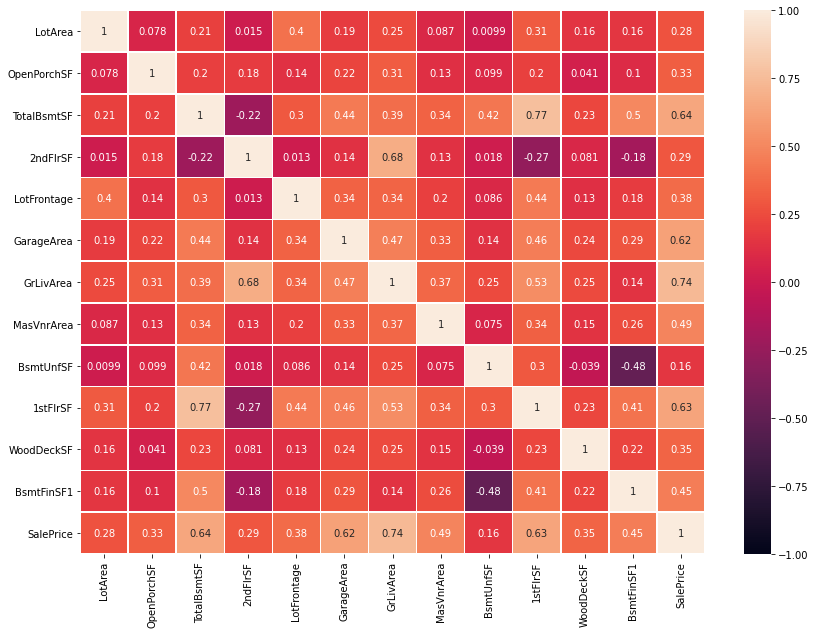

In [120]:
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, linewidths=.5, annot=True)

<b>Conclusion:</b> correlation between features is within reasonable values, no feature will be removed.

#### 1.2.9 Correlation Against Target Variable (SalePrice)<a class="anchor" id="catv"></a>

In [121]:
# Remove features with low correlation (<0.01) with the target variable(SalePrice)
corr_matrix['SalePrice'].abs().sort_values(ascending=False)

SalePrice      1.000000
GrLivArea      0.736036
TotalBsmtSF    0.642354
1stFlrSF       0.634672
GarageArea     0.621900
MasVnrArea     0.486620
BsmtFinSF1     0.454087
LotFrontage    0.382420
WoodDeckSF     0.350127
OpenPorchSF    0.326489
2ndFlrSF       0.293338
LotArea        0.275066
BsmtUnfSF      0.159724
Name: SalePrice, dtype: float64

<b>Conslusion:</b> no features will be removed since correlation between target variable and features is within reasonable values.


#### 1.2.10 Checking for Normality: Dependent Variable<a class="anchor" id="cndv"></a>

variable = y
Median: 159000.0
Mean: 175567.64318276005
Skew: 1.7453580480340125
Kurtosis: 5.825763749688768
--------------------------------------------------
variable = log10(y)
Median: 5.201397124320452
Mean: 5.244444479212366
Skew: 0.24188453291963574
Kurtosis: 0.7653528688452214


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

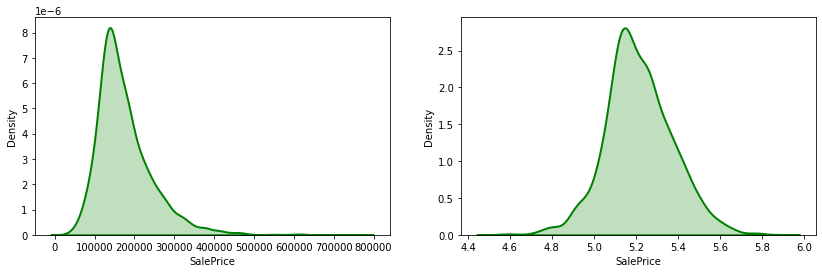

In [122]:
# Check Target variable for normal distribution
print('variable = y')
print("Median: " + str(dataset_encoded['SalePrice'].median()))
print("Mean: " + str(dataset_encoded['SalePrice'].mean()))
print("Skew: " + str(dataset_encoded['SalePrice'].skew()))
print("Kurtosis: " + str(dataset_encoded['SalePrice'].kurtosis()))
print("-"*50)
# log10
print("variable = log10(y)")
print("Median: " + str(np.log10(dataset_encoded['SalePrice'].median())))
print("Mean: " + str(np.log10(dataset_encoded['SalePrice'].mean())))
print("Skew: " + str(np.log10(dataset_encoded['SalePrice'].skew())))
print("Kurtosis: " + str(np.log10(dataset_encoded['SalePrice'].kurtosis())))
# creating axes to draw plots 
fig, ax = plt.subplots(1, 2, figsize=(14,4)) 
sns.distplot(dataset_encoded['SalePrice'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Original", color ="green", ax = ax[0]) 
sns.distplot(np.log10(dataset_encoded['SalePrice']), hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "log10", color ="green", ax = ax[1])


<b>Conclusion:</b> Calculating the log10 of the target variable produces a distribution closer to the normal distribution.

#### 1.2.11 Checking for Normality: Independent Variables<a class="anchor" id="cniv"></a>

In [123]:
# Continuous variables -> skewness
cont_var_skew = pd.DataFrame((dataset_encoded[continuous_variables_updated]).skew().abs()).reset_index()
cont_var_log_skew = pd.DataFrame(np.log10(dataset_encoded[continuous_variables_updated]+1).skew().abs()).reset_index()
cont_var_skew.columns = ['feature','skewness']
cont_var_log_skew.columns = ['feature','skewness_log']
cont_skew = cont_var_skew.merge(cont_var_log_skew, on="feature", how="inner")
cont_skew

,feature,skewness,skewness_log
0,LotArea,13.393921,0.513180
1,OpenPorchSF,2.269634,0.000086
2,TotalBsmtSF,0.456386,4.948562
3,2ndFlrSF,0.804118,0.269066
4,LotFrontage,1.137594,1.112926
5,GarageArea,0.192519,3.738757
6,GrLivArea,0.940956,0.036984
7,MasVnrArea,2.750254,0.586703
8,BsmtUnfSF,0.978891,2.129723
9,1stFlrSF,1.043301,0.024600


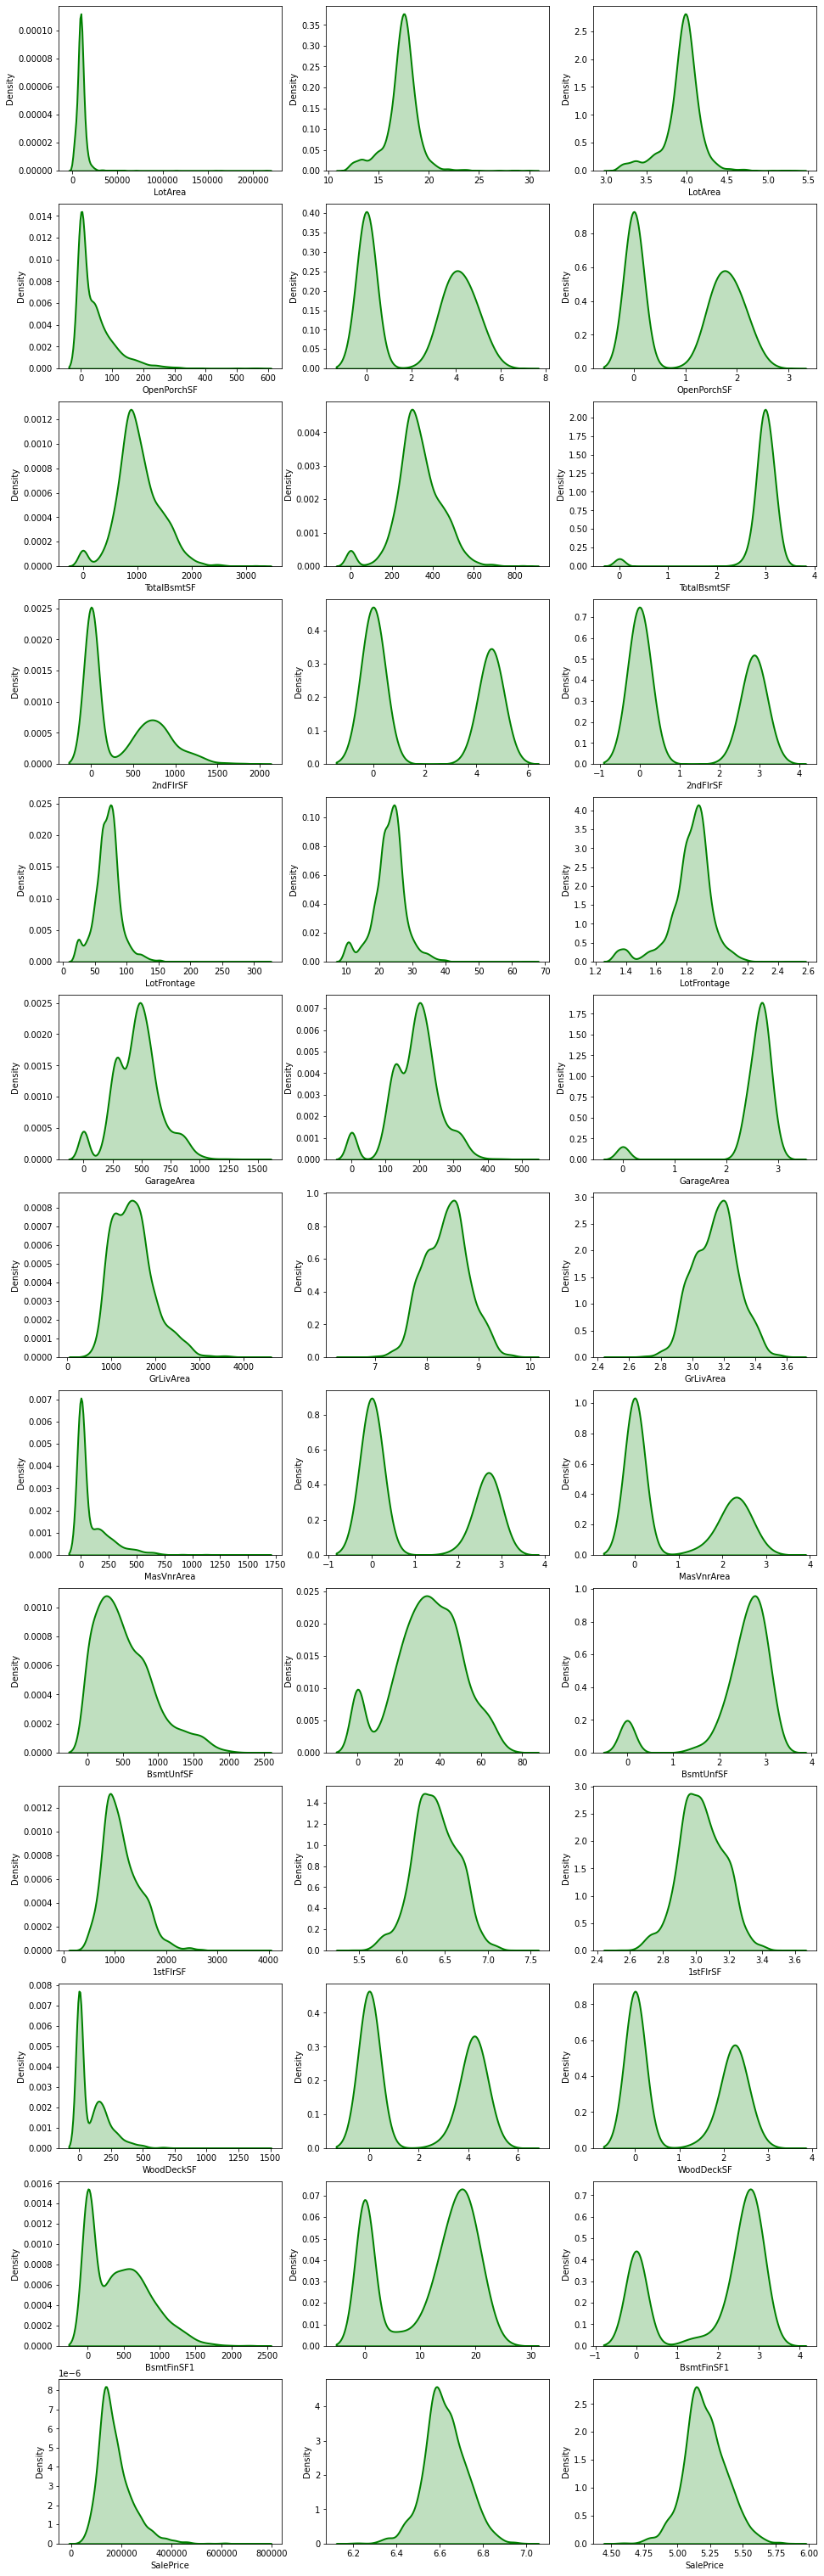

In [124]:
# creating axes to draw plots: 3 plots per feature
fig, ax = plt.subplots(dataset_encoded[continuous_variables_updated].shape[1], 3,  figsize=(16,55))
# Plot original data, boxcox, and log10
for i,feature in enumerate(continuous_variables_updated):
    original_data = dataset_encoded[feature]+1
    sns.distplot(original_data, hist = False, kde = True, 
                kde_kws = {'shade': True, 'linewidth': 2},  
                label = "Original", color ="green", ax = ax[i,0]) 

    fitted_data, fitted_lambda = stats.boxcox(original_data) 
    sns.distplot(fitted_data, hist = False, kde = True, 
                kde_kws = {'shade': True, 'linewidth': 2},  
                label = "Boxcox", color ="green", ax = ax[i,1]) 

    sns.distplot(np.log10(original_data), hist = False, kde = True, 
                kde_kws = {'shade': True, 'linewidth': 2},  
                label = "Log10", color ="green", ax = ax[i,2])

<b>Conclusion:</b> we will take the log10 of the following features: 1stFirSF, GrLivArea, and LotArea

In [125]:
# Take log10 of GrLivArea, LotArea, and 1stFlrSF
dataset_encoded['log10_GrLivArea'] = np.log10(dataset_encoded['GrLivArea'])
dataset_encoded['log10_LotArea'] = np.log10(dataset_encoded['LotArea'])
dataset_encoded['log10_1stFlrSF'] = np.log10(dataset_encoded['1stFlrSF']+1)     # +1 : This means we are adding bias, but is needed for zero
# Remove original columns
dataset_encoded.drop(columns=['GrLivArea','LotArea','1stFlrSF'], inplace=True)

<br><br>
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### 1.3 Feature Selection<a class="anchor" id="fs"></a>

#### 1.3.1 Using Lasso Regression to Select Features<a class="anchor" id="lasso"></a>

In [126]:
X = dataset_encoded.drop('SalePrice',axis=1)  # features
y = dataset_encoded['SalePrice']              # target
X_norm = MinMaxScaler().fit_transform(X)      # Transform features by scaling each feature to a given range (0,1).

In [127]:
# Using Lasso to select features
clf = LassoCV(alphas=np.arange(0.0001, 0.01)).fit(X_norm, y)   # set alpha low to ensure the features will have more relevance
importance = np.abs(clf.coef_)

In [128]:
# create dataframe Feature - Importance
features =[]
scores = []
for i, feature in enumerate(X.columns):
    if importance[i]>0:
        features.append(feature)
        scores.append(importance[i])
# dataframe
feature_score = pd.DataFrame.from_dict({"feature":features,"Score":scores})

In [129]:
# top 20 features with highest importance value
lasso_generated_features = list(feature_score.sort_values(by="Score", ascending=False).head(20)['feature'])

<br><br>
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### 1.4 Descriptive Modeling<a class="anchor" id="dm"></a>

#### 1.4.1 Train and Test data<a class="anchor" id="ttd"></a>

In [130]:
# dataset -> Includes all features - Ordinal features encoded, Nominal features not dummified.
# dataset_encoded.shape -> Includes all features - Ordinal and Nominal features encoded/dummified.
# X -> Same as dataset_encoded without SalePrice feature
# Y -> Same as dataset_encoded but only SalePrice feature
# X_norm -> Same as X but all the numerical values scaled (0,1)

In [131]:
# Split data 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

#### 1.4.2 Multiple Linear Regression with all the features<a class="anchor" id="mlr"></a>

In [132]:
# Create model: Multiple Linear Regression
mlr_model = LinearRegression()
mlr_model.fit(X_train,np.log(y_train))

LinearRegression()

In [133]:
# # Calculate R-squared (score) using Training data
mlr_model.score(X_train,np.log(y_train))

0.959624961287974

In [134]:
# Calculate R-squared (score) using Test data
mlr_model.score(X_test,np.log(y_test))

0.93538033977127

#### 1.4.3 Multiple Linear Regresion with limited number of features<a class="anchor" id="mlr2"></a>

In [135]:
# Fit model with training data using Lasso generated features (top 20)
mlr_model.fit(X_train[lasso_generated_features], np.log10(y_train))
# Calculate R-squared (score) using training data
mlr_model.score(X_train[lasso_generated_features], np.log10(y_train))

0.9179264811441009

In [136]:
# Calculate R-squared (score) using test data
mlr_model.score(X_test[lasso_generated_features], np.log10(y_test))

0.9149734652660034

In [137]:
# Coefficients for features
for i, name_c in enumerate(lasso_generated_features):
    print(name_c +":  " + "{:.6f}". format(mlr_model.coef_[i]))

log10_1stFlrSF:  0.224389
TotalBsmtSF:  0.000078
Condition2_PosA:  0.054751
2ndFlrSF:  0.000071
Exterior2nd_PreCast:  0.097989
Neighborhood_GrnHill:  0.176245
log10_LotArea:  0.103514
OverallQual:  0.040563
RoofMatl_WdShngl:  0.019533
Condition2_PosN:  0.058600
MasVnrArea:  0.000028
GarageType_None:  -0.031375
YearBuilt:  0.001515
log10_GrLivArea:  0.181632
OverallCond:  0.021578
Heating_OthW:  -0.052824
Exterior1st_PreCast:  0.097989
BsmtUnfSF:  -0.000044
BsmtCond:  0.005654
Condition2_RRAn:  0.000000


#### 1.4.4 Evaluating p-values and R-squared using Statmodels<a class="anchor" id="statmodel"></a>

In [138]:
# Statmodels does not like feature names starting with a number
X_stat = dataset_encoded.rename(columns={'2ndFlrSF':'FlrSF2nd'})
y_stat = dataset['SalePrice']
# Split data 70/30
X_train_stat, X_test_stat, y_train_stat, y_test_stat = train_test_split(X_stat, y_stat, test_size=0.30, random_state=10)
smf_model_features = lasso_generated_features
smf_model_features[3] = 'FlrSF2nd'

In [139]:
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('np.log10(SalePrice) ~ ' + ' + '.join(smf_model_features), data=X_train_stat).fit()

# Inspect the results
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     np.log10(SalePrice)   R-squared:                       0.918
Model:                             OLS   Adj. R-squared:                  0.917
Method:                  Least Squares   F-statistic:                     1038.
Date:                 Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                         01:26:42   Log-Likelihood:                 2771.4
No. Observations:                 1689   AIC:                            -5505.
Df Residuals:                     1670   BIC:                            -5402.
Df Model:                           18                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             

In [140]:
# Decided to remove the following features whose Statistical Significance is low and some of the nominal features
smf_model_features = set(lasso_generated_features) - set(['Condition2_PosA','RoofMatl_WdShngl',
                                                          'Condition2_PosN','Heating_OthW','Condition2_RRAn'])

In [141]:
# Let's try again
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('np.log10(SalePrice) ~ ' + ' + '.join(smf_model_features), data=X_train_stat).fit()

# Inspect the results
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     np.log10(SalePrice)   R-squared:                       0.918
Model:                             OLS   Adj. R-squared:                  0.917
Method:                  Least Squares   F-statistic:                     1331.
Date:                 Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                         01:26:43   Log-Likelihood:                 2767.5
No. Observations:                 1689   AIC:                            -5505.
Df Residuals:                     1674   BIC:                            -5424.
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             

#### 1.4.5 Further narrowing of the number of features<a class="anchor" id="fnnf"></a>

In [142]:
# We are able to create a model with 7 features very close to the same R-squared of the 15 features model.
scores_models = {}
for features in itertools.combinations(smf_model_features, len(smf_model_features)-8):
    results = smf.ols('np.log10(SalePrice) ~ ' + ' + '.join(features), data=X_train_stat).fit()
    scores_models[features] = results.rsquared_adj

In [143]:
max_score_features = max(scores_models, key=scores_models.get) # set of features with max scores
scores_models[max_score_features]

0.9100707589576454

In [144]:
list(max_score_features)

['YearBuilt',
 'log10_LotArea',
 'TotalBsmtSF',
 'OverallCond',
 'BsmtUnfSF',
 'log10_GrLivArea',
 'OverallQual']

In [145]:
# Create model with seven features selected above
results = smf.ols('np.log10(SalePrice) ~ ' + ' + '.join(max_score_features), data=X_train_stat).fit()
# Inspect the results
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     np.log10(SalePrice)   R-squared:                       0.910
Model:                             OLS   Adj. R-squared:                  0.910
Method:                  Least Squares   F-statistic:                     2441.
Date:                 Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                         01:49:51   Log-Likelihood:                 2697.7
No. Observations:                 1689   AIC:                            -5379.
Df Residuals:                     1681   BIC:                            -5336.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1322      

#### 1.4.6 Final Set of Features to use in the Model<a class="anchor" id="final"></a>

The following features were selected to train our descriptive model: log10_GrLivArea
YearBuilt, TotalBsmtSF, log10_LotArea, BsmtUnfSF, OverallCond, and OverallQual.

$\hat{Y}\;  =\;  \hat{\beta}_{0}\;  + \; \hat{\beta}_{1}\,log_{10}(GrLivArea)\;  + \; \hat{\beta}_{2}\,(YearBuilt)\; +\; \hat{\beta}_{3}\,(TotalBsmtSF)\; +\; \hat{\beta}_{4}\,Log_{10}(LotArea)\\ \;\;\;\;\;\;\;\;\;+ \hat{\beta}_{5}\,(BsmtUnfSF)\; +\; \hat{\beta}_{6}\,(OverallCond)\; + \;\hat{\beta}_{7}\,(OverallQual)\; +\; \epsilon $



<p>&nbsp;</p>
<table style="border-collapse: collapse; width: 0%; height: 144px;" border="1">
<thead>
<tr style="height: 18px; background-color: #e9ecbd;">
<td style="width: 35.2273%; height: 18px; text-align: center; border-style: ridge;">Feature</td>
<td style="width: 64.7727%; height: 18px; text-align: center; border-style: ridge;">Description</td>
</tr>
</thead>
<tbody>
<tr style="height: 18px;">
<td style="width: 35.2273%; height: 18px; text-align: left; border-style: ridge;">Lot Area (Continuous)</td>
<td style="width: 64.7727%; height: 18px; text-align: left; border-style: ridge;">Lot size in square feet</td>
</tr>
<tr style="height: 18px;">
<td style="width: 35.2273%; height: 18px; text-align: left; border-style: ridge;">Overall Qual (Ordinal)</td>
<td style="width: 64.7727%; height: 18px; text-align: left; border-style: ridge;">Rates the overall material and finish of the house</td>
</tr>
<tr style="height: 18px;">
<td style="width: 35.2273%; height: 18px; text-align: left; border-style: ridge;">Overall Cond (Ordinal)</td>
<td style="width: 64.7727%; height: 18px; text-align: left; border-style: ridge;">Rates the overall condition of the house</td>
</tr>
<tr style="height: 18px;">
<td style="width: 35.2273%; height: 18px; text-align: left; border-style: ridge;">Year Built (Discrete)</td>
<td style="width: 64.7727%; height: 18px; text-align: left; border-style: ridge;">Original construction date</td>
</tr>
<tr style="height: 18px;">
<td style="width: 35.2273%; height: 18px; text-align: left; border-style: ridge;">Total Bsmt SF (Continuous)</td>
<td style="width: 64.7727%; height: 18px; text-align: left; border-style: ridge;">Total square feet of basement area</td>
</tr>
<tr style="height: 18px;">
<td style="width: 35.2273%; height: 18px; text-align: left; border-style: ridge;">Gr Liv Area (Continuous)</td>
<td style="width: 64.7727%; height: 18px; text-align: left; border-style: ridge;">Above grade (ground) living area square feet</td>
</tr>
<tr style="height: 18px;">
<td style="width: 35.2273%; height: 18px; text-align: left; border-style: ridge;">Bsmt Unf SF (Continuous)</td>
<td style="width: 64.7727%; height: 18px; text-align: left; border-style: ridge;">Unfinished square feet of basement area</td>
</tr>
</tbody>
</table>

<br><br><br><br><br>
<hr>

<b>Ava: </b>'BsmtQual', 'BsmtCond','BsmtFinType1', 'BsmtFinType1', 'BsmtUnfSF', 'TotalBsmtSF'

<b>Khamanna: </b>'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'GarageFinish', GarageQual', 'GarageCond',

<b>Ariel:</b>'OverallQual', 'OverallCond', 'PavedDrive', 'Fence', 'RoofStyle', 'RoofMatl',

<b>Shay: </b>'HeatingQC', 'CentralAir', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'LowQualFinSF'
 
y = beta0 + beta1*X1 + beta2*X2 + beta3*X3 + beta4*X4 ...+ betan*Xn(Exterior Quality)

1) Garage -> 'GarageFinish', 'GarageQual', 'GarageCond'
2) Exterior -> 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd'

1) Basement -> 'BsmtQual', 'BsmtCond','BsmtFinType1', 'BsmtFinType1', 'BsmtUnfSF', 'TotalBsmtSF'
2) 'Fireplaces', 'FireplaceQu', 

1) Overall Condition -> 'OverallQual', 'OverallCond', 
2) RoofStyle, RoofMatl

1) AC -> 'HeatingQC', 'CentralAir'
2) 'KitchenAbvGr', 'KitchenQual'
3) 'LowQualFinSF'

In [ ]:
#//////////////////////////////////////////divider///////////////////////////////////////////////////////////////////////

# Person 1 Features 

# Person 2 Features 

# Person 3 Features 

# Person 4 Features 

# Conclusion 